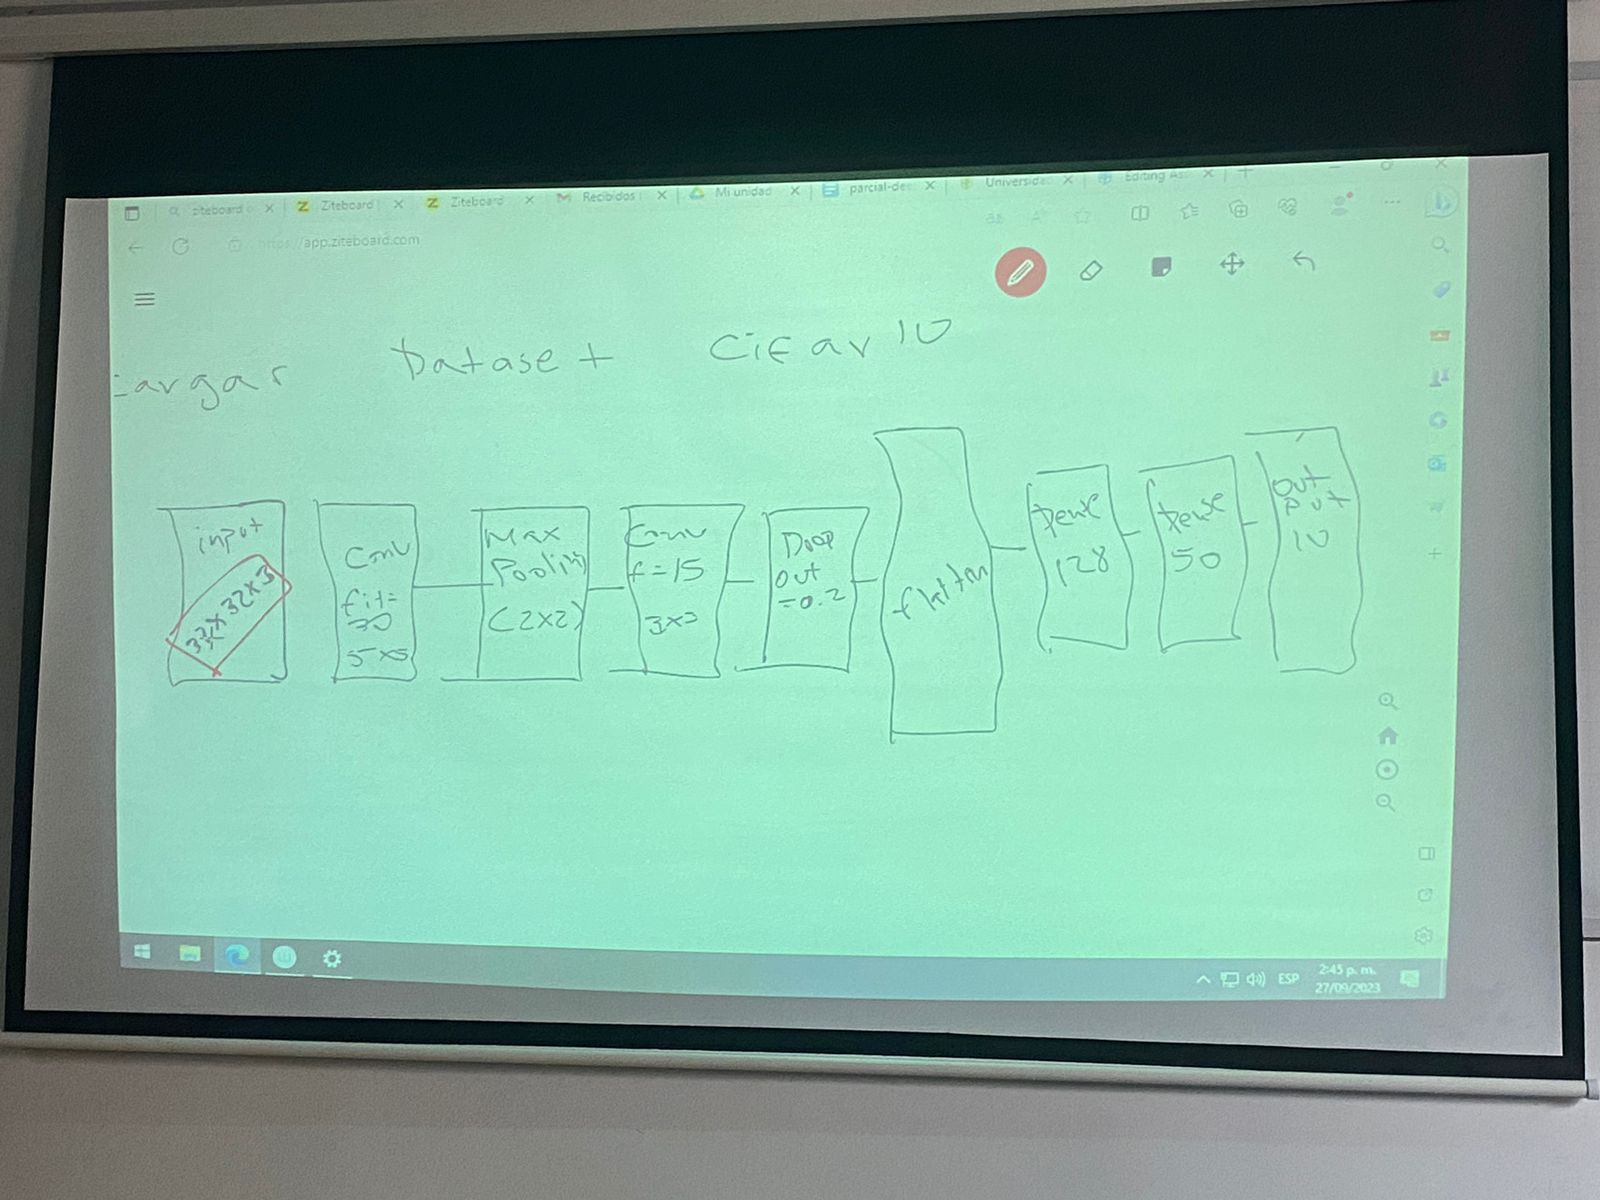

In [ ]:
# Imports
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten

In [ ]:
data = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 12s 0us/step


In [ ]:
train, test = data

In [ ]:
X_train, y_train = train
X_test, y_test = test

In [ ]:
X_train[0].shape

(32, 32, 3)

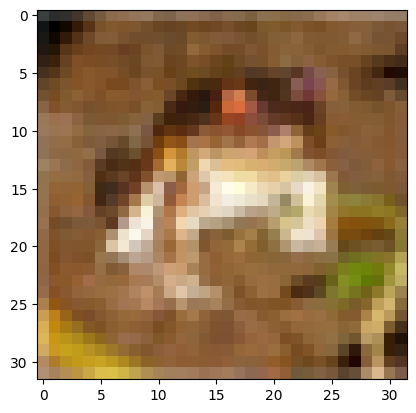

In [ ]:
plt.imshow(X_train[0], cmap='gray')

In [ ]:
input_shape = X_train[0].shape
print(input_shape)
# Creación de la red
model = Sequential()
model.add(Conv2D(30, activation='relu', input_shape= input_shape,  kernel_size=(5, 5)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu', name='dense1'))
model.add(Dense(50, activation='relu', name='dense2'))
model.add(Dense(10, activation='softmax', name='output'))




(32, 32, 3)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 30)        2280      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 30)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 30)        0         
                                                                 
 flatten (Flatten)           (None, 5880)              0         
                                                                 
 dense1 (Dense)              (None, 128)               752768    
                                                                 
 dense2 (Dense)              (None, 50)                6450      
                                                        

In [ ]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy, metrics='accuracy')

In [ ]:
model.fit(X_train, y_train, epochs=10,validation_data =(X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 17s 4ms/step - loss: 2.5538 - accuracy: 0.2852 - val_loss: 2.3267 - val_accuracy: 0.1927
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8705 - accuracy: 0.3460 - val_loss: 1.7687 - val_accuracy: 0.3559
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7207 - accuracy: 0.4010 - val_loss: 1.6692 - val_accuracy: 0.3979
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5645 - accuracy: 0.4538 - val_loss: 1.7636 - val_accuracy: 0.3953
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4537 - accuracy: 0.4984 - val_loss: 1.4996 - val_accuracy: 0.4808
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3933 - accuracy: 0.5278 - val_loss: 1.4063 - val_accuracy: 0.5228
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3251 - accuracy: 0.5528 - val_loss: 1.3108 - val_accuracy

In [ ]:
def sigmoid(z):
  return(1/(1+ np.exp(-z)))

In [ ]:
z1 = np.dot([0.5],[0.3])
a1 = sigmoid(z1)
print("a1 ",a1)
z2 = np.dot(a1,[0.2])
a2 = sigmoid(z2)
a2 = float(a2[0])
print("a2 ",a2)
z3 = np.dot(a2,[0.4])
a3 = sigmoid(z3)
a3 = float(a3[0])
print("a3 ",a3)

a1  0.5374298453437496
a2  0.5268456510695569
a3  0.5524904476567374


In [ ]:
dc = -2*(1 -a3)
da3 = a3 * (1-a3)
dz3 = a2

In [ ]:
dw3 = dc*da3*dz3
dw3

-0.11658502999488622

In [ ]:
w3 = 0.4 - (0.01*dw3)
print( "Nuevo valor manual de w3 :",w3)

Nuevo valor manual de w3 : 0.4011658502999489


In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(1, input_dim = 1,activation = 'sigmoid', use_bias = False, name='capa_entrada'))
model.layers[-1].set_weights([np.array([[0.3]])])
model.add(keras.layers.Dense(1, input_dim = 1,activation = 'sigmoid', use_bias = False, name='capa_densa1'))
model.layers[-1].set_weights([np.array([[0.2]])])
model.add(keras.layers.Dense(1, input_dim = 1,activation = 'sigmoid',use_bias = False,name='capa_salida'))
model.layers[-1].set_weights([np.array([[0.4]])])

In [ ]:
model.compile( optimizer=keras.optimizers.SGD(learning_rate=0.01), loss = 'mse')
model.fit([0.5],[1],epochs = 1)


1/1 [==============================] - 0s 342ms/step - loss: 0.2003


In [ ]:
model.weights

[<tf.Variable 'capa_entrada/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.3000055]], dtype=float32)>,
 <tf.Variable 'capa_densa1/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.20011859]], dtype=float32)>,
 <tf.Variable 'capa_salida/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.40116584]], dtype=float32)>]

In [ ]:
print("Valor de a2 :",model.predict([[0.5]]))

1/1 [==============================] - 0s 51ms/step
Valor de a2 : [[0.5526439]]


In [ ]:
print("W2 con keras: ",model.get_weights()[2])

W2 con keras:  [[0.40116584]]


In [ ]:
dw2 = -2 * (1- a3) * a3 * (1-a3) * w3 * a2 * (1-a2) * a1
dw2

-0.011892998434951795

In [ ]:
w2 = 0.2 - (0.01*dw2)
print( "Nuevo valor manual de w2 :",w2)

Nuevo valor manual de w2 : 0.20011892998434952


In [ ]:
print("W2 con keras: ",model.get_weights()[1])

W2 con keras:  [[0.20011859]]


In [ ]:
dw1 = -2*(1-a3) * a3 * (1-a3) * w3 * a2 * (1-a2)  * w2* a1 * (1-a1) * 0.5
dw1

-0.0005504617500425161

In [ ]:
w1 = 0.3 - (0.01*dw1)
print( "Nuevo valor manual de w1 :",w1)

Nuevo valor manual de w1 : 0.3000055046175004


In [ ]:
print("W1 con keras: ",model.get_weights()[0])

W1 con keras:  [[0.3000055]]
